
# Project: Investigate a Dataset - [TMDB_Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Questions for Analysis
> 1. Which movies has the highest and lowest profit?
> 2. What is the average budget of the most popular movies and the least popular movies.
> 3. What is the years with most and least average popular movies?
> 4. What is the correlation between the budget and the profit?
> 5. What is the correlation between the profit and the popularity?
> 6. Who is the most frequent actor to appear in the movies with the highest profit?
> 7. What is the most frequent genres to appear in the movies with the highest profit?
> 8. What is the average runtime of the movies with the highest profit?

>In this cell we will setup our analysis environment and import the required modules.

In [1]:
# Import all the packages needed for analysis
import numpy as np
import pandas as pd
import datetime
# to Print our visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section we will load our data and inspect it in order to assess and clean.


In [2]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>Let's print the shape of our dataset

In [3]:
print('Our dataset has {} columns and {} rows.'.format(df_movies.shape[1], df_movies.shape[0]))

Our dataset has 21 columns and 10866 rows.


>here we print some information about our dataset and data types of every column.

In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Here we check if there is any duplicated enteries.

In [6]:
df_movies.duplicated().sum()

1


### Data Cleaning
> Steps to do in the cleaning process:
>>1. Drop some columns like 'id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'
>>2. Change the data type of 'release_date' column to datetime.
>>3. Change the data type of 'budget_adj' and 'revenue_adj' columns to int64.
>>4. Drop duplicated enteries.
>>5. In the 'budget', 'revenue', 'budget_adj', 'revenue_adj' and 'runtime' columns there is some enteries with value 0 which means these values was not recorded for this movies. We will replace the value of 0 in these columns with NAN in order to drop it.
>>6. Check for Null values and drop them.

In [7]:
df_movies.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)

> There is one duplicated row so we will drop it and check after being dropped.

In [8]:
df_movies.drop_duplicates(inplace = True)
df_movies.duplicated().sum()

0

> Change the release date column to datetime format.


In [9]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

> Change 'budget', 'revenue', 'budget_adj', and 'revenue_adj' to int64 

In [10]:
columns = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
df_movies[columns] = df_movies[columns].astype(np.int64)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  int64         
 2   revenue               10865 non-null  int64         
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   runtime               10865 non-null  int64         
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
 10  vote_count            10865 non-null  int64         
 11  vote_average          10865 non-null  float64       
 12  release_year          10865 non-null  int64         
 13  budget_adj      

> In the 'budget', 'revenue', 'budget_adj', 'revenue_adj' and 'runtime' columns there is some enteries with value 0 which means these values was not recorded for this movies.
> We will replace the value of 0 in these columns with NAN in order to drop it later.

In [11]:
columns = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df_movies[columns] = df_movies[columns].replace(0, np.NAN)
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,5.167000e+03,4.849000e+03
mean,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,3.690335e+07,1.151009e+08
std,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,4.196280e+07,1.988557e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,1.000000e+00,2.000000e+00
25%,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.273036e+07,4.395666e+07
75%,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> Now we will check for null values and decide about how to deal with it.

In [12]:
df_movies.isnull().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5698
revenue_adj             6016
dtype: int64

In [13]:
df_movies.dropna(inplace = True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3804 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3804 non-null   float64       
 1   budget                3804 non-null   float64       
 2   revenue               3804 non-null   float64       
 3   original_title        3804 non-null   object        
 4   cast                  3804 non-null   object        
 5   director              3804 non-null   object        
 6   runtime               3804 non-null   float64       
 7   genres                3804 non-null   object        
 8   production_companies  3804 non-null   object        
 9   release_date          3804 non-null   datetime64[ns]
 10  vote_count            3804 non-null   int64         
 11  vote_average          3804 non-null   float64       
 12  release_year          3804 non-null   int64         
 13  budget_adj       

> We will add the 'profit_adj' column which calculates the profit of every movie.

In [14]:
df_movies['profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']

Let's have a look at our cleaned dataset.

In [15]:
df_movies.shape

(3804, 16)

In [16]:
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,1.254446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08,2.101614e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.0,2.716190e+08,1.704191e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.0,1.385749e+09,1.210949e+09


In [17]:
df_movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,3804.000000,3.804000e+03,3.804000e+03,3804.000000,3804.000000,3804.000000,3804.000000,3.804000e+03,3.804000e+03,3.804000e+03
mean,1.203964,3.761788e+07,1.090020e+08,109.356204,534.284963,6.170794,2001.226604,4.473152e+07,1.387524e+08,9.402088e+07
std,1.480722,4.232296e+07,1.773121e+08,19.845805,883.839612,0.792415,11.329997,4.488701e+07,2.170142e+08,1.950529e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,1.000000e+00,2.000000e+00,-4.139124e+08
25%,0.470645,1.000000e+07,1.435081e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925985e+07,-1.420694e+06
50%,0.811020,2.500000e+07,4.621892e+07,106.000000,209.000000,6.200000,2004.000000,3.038730e+07,6.293447e+07,2.851789e+07
75%,1.387380,5.000000e+07,1.261064e+08,119.000000,584.250000,6.700000,2010.000000,6.087715e+07,1.658074e+08,1.090269e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Q1. Which movies has the highest and lowest profit?

>here we will search for the movie with the highest profit in terms of 2010 dollar.

In [18]:
df_movies.loc[df_movies['profit_adj'].idxmax]

popularity                                                      12.037933
budget                                                         11000000.0
revenue                                                       775398007.0
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
runtime                                                             121.0
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                                                         1977
budget_adj                            

>**Star Wars** is the movie with the highest profit with a value of  2,789,712,242 dollars

>here we will search for the movie with the lowest profit in terms of 2010 dollar.

In [19]:
df_movies.loc[df_movies['profit_adj'].idxmin]

popularity                                                        0.25054
budget                                                        425000000.0
revenue                                                        11087569.0
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                             100.0
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
budget_adj                            

>**The Warrior's Way** is the movie with the lowest profit with a loss of  413,912,431 dollars

### Q2. What is the average budget of the highest and lowest profit movies?

> In the next cell we devide the dataset into two datasets, one for the movies with higher profit and the other for the movies with lower profit.

In [20]:
profit_median = df_movies['profit_adj'].median()
df_high_profit = df_movies.query('profit_adj >= {}'.format(profit_median))
df_low_profit = df_movies.query('profit_adj < {}'.format(profit_median))

> Then we will get the average budget of each dataset.

In [21]:
mean_budget_high = df_high_profit['budget'].mean()
mean_budget_high

49163123.492639326

In [22]:
mean_budget_low = df_low_profit['budget'].mean()
mean_budget_low

26072642.494742375

>Let's draw a bar diagram to compare them.

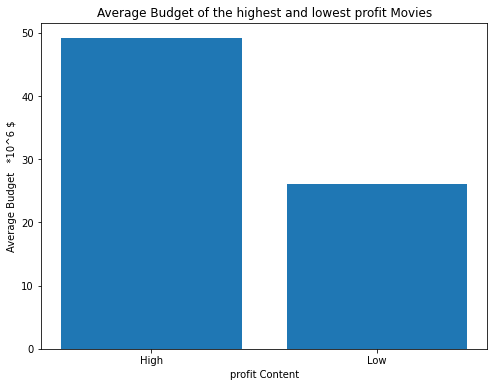

In [23]:
locations = [1, 2]
heights = [mean_budget_high/1000000, mean_budget_low/1000000]
labels = ['High', 'Low']
plt.subplots(figsize=(8,6))
plt.bar(locations, heights, tick_label = labels)
plt.title("Average Budget of the highest and lowest profit Movies")
plt.xlabel("profit Content")
plt.ylabel("Average Budget   *10^6 $");

### Q3. What is the years with highest and lowest movies' profit?

> We will group our main dataset by release year and get the average profit for every year then get the maximum and minimum year profit

In [24]:
df_years = df_movies.groupby('release_year')['profit_adj'].mean()

In [25]:
print('{} is the year with the highest average profit of {} in terms of 2010 dollar'.format(df_years.idxmax(), df_years.loc[df_years.idxmax()]))

1965 is the year with the highest average profit of 552651100.6 in terms of 2010 dollar


In [26]:
print('{} is the year with the lowest average profit of {} in terms of 2010 dollar'.format(df_years.idxmin(), df_years.loc[df_years.idxmin()]))

2006 is the year with the lowest average profit of 56145711.73809524 in terms of 2010 dollar


## In the next cell we will define a function which will be used in the next two explorations.

> This Function draws a line of best fit for a scatter plot.

In [27]:
#this function takes as input two series of data
#it does not return and values.
def best_fit_line(x, y):
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m * x + b)

### Q4. What is the correlation between the budget and the profit both in terms of 2010 dollar?

> in the next cell we will plot a scatter digram to eplore that relation

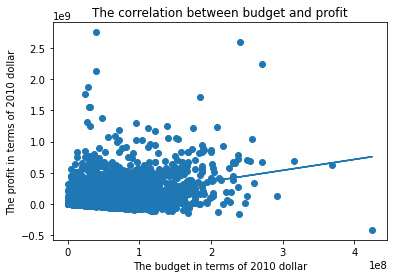

In [28]:
plt.scatter(df_movies['budget_adj'], df_movies['profit_adj'])
best_fit_line(df_movies['budget_adj'], df_movies['profit_adj'])
plt.title('The correlation between budget and profit')
plt.xlabel('The budget in terms of 2010 dollar')
plt.ylabel('The profit in terms of 2010 dollar');

> As shown in the previous plot there is a positive correlation between budget and profit, but it may be considered as a weak positive correlation.

### Q5. What is the correlation between the profit and the popularity of the movies?

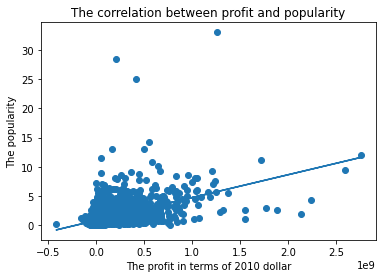

In [29]:
plt.scatter(df_movies['profit_adj'], df_movies['popularity'])
best_fit_line(df_movies['profit_adj'], df_movies['popularity'])
plt.title('The correlation between profit and popularity')
plt.xlabel('The profit in terms of 2010 dollar')
plt.ylabel('The popularity');

> As shown in the previous plot there is a positive correlation between profit and popularity.

## In the next cell we will define a function which will be used in the next two explorations.

> This Function counts the number of repetitions for each word in a column, it will be used with the columns 'cast' and 'genres' as each record of these columns may have more than one value.

In [30]:
#this function takes as input a pandas dataframe, a column  name, and the seprator of the words
#it returns a pandas series of the words as indices and the count of each word
def word_counts(df, col , s):
    count_series = pd.Series(df[col].str.cat(sep = s).split(sep = s)).value_counts()
    return count_series

### Q6. Who is the most frequent actor to appear in the movies with the most profit?

> we will concatenate all cast members that appear in the movies with higher profit then we will count the appearance of every member and find the most frequent actor to appear.

In [31]:
col = 'cast'
sep = '|'
cast = word_counts(df_high_profit, col, sep)
print('{} is the most frequent actor to appear in the movies with higher profit with {} movies.'.format(cast.idxmax(), cast.loc[cast.idxmax()]))

Tom Cruise is the most frequent actor to appear in the movies with higher profit with 30 movies.


> Let's plot a bar diagram to compare the most frequent 20 Actor

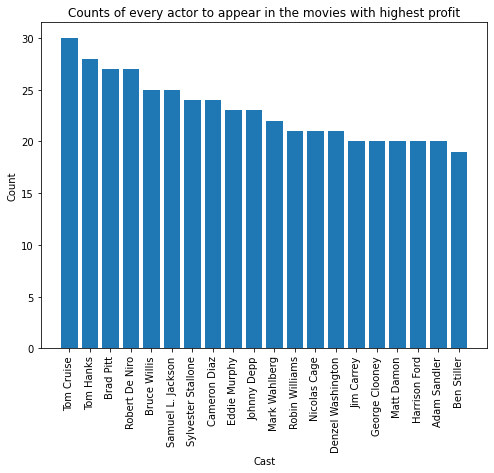

In [32]:
plt.subplots(figsize=(8,6))
plt.bar(cast.head(20).index, cast.head(20))
plt.title('Counts of every actor to appear in the movies with highest profit')
plt.xlabel('Cast')
plt.ylabel('Count')
plt.xticks(rotation = 90);

> Tom Cruise, Tom Hanks and Rober De Niro are the most frequent actors in the movies with higher profit.

### Q6. What is the most frequent genres to appear in the movies with the highest profit?

> we will concatenate all the genres that appear in the movies with higher profit then we will count the appearance of every member and find the most frequent genre to appear.

In [33]:
col = 'genres'
sep = '|'
genres = word_counts(df_high_profit, col, sep)
print('{} is the most frequent genre to appear in the movies with higher profit with {} movies.'.format(genres.idxmax(), genres.loc[genres.idxmax()]))

Drama is the most frequent genre to appear in the movies with higher profit with 736 movies.


> Let's plot a bar diagram to compare the top genres

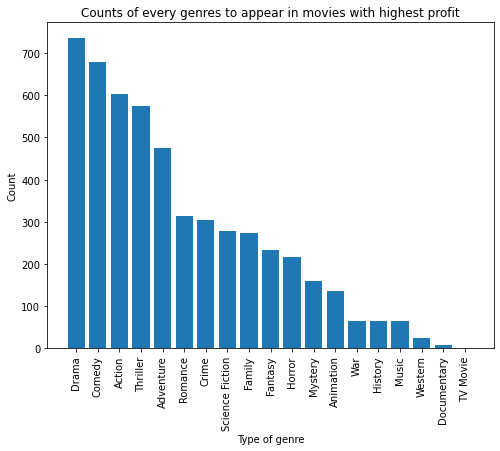

In [34]:
plt.subplots(figsize=(8,6))
plt.bar(genres.index, genres)
plt.title('Counts of every genres to appear in movies with highest profit')
plt.xlabel('Type of genre')
plt.ylabel('Count')
plt.xticks(rotation = 90);

> Drama, Comedy, and Action movies have the highest profit between all genres.

### Q6. What is the average runtime of the movies with the highest profit?

In [35]:
print('The average runtime of the movies with the highest profit is {} minutes.'.format(int(df_high_profit['runtime'].mean())))

The average runtime of the movies with the highest profit is 112 minutes.


> in the next cell we will plot the runtime distribution of the movies with the highest profit.

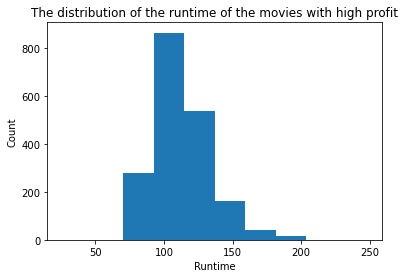

In [36]:
plt.hist(df_high_profit['runtime'])
plt.title('The distribution of the runtime of the movies with high profit')
plt.xlabel('Runtime')
plt.ylabel('Count');

> We notice that runtime distribution is skewed to the right with a mean of 112 minutes.

<a id='conclusions'></a>
## Conclusions

>1. **Star Wars** is the movie with the highest profit with a value of  2,789,712,242 dollars.
>2. **The Warrior's Way** is the movie with the lowest profit with a loss of 413,912,431 dollars.
>3. **The average budget** of the movies with the highest profit is 49,163,123 dollars.
>4. **The average budget** of the movies with the lowest profit is 26,072,642 dollars.
>5. **1965** is the year with the highest average profit of 552,651,100 dollars in terms of 2010 dollar.
>6. **2006** is the year with the lowest average profit of 56,145,711 dollars in terms of 2010 dollar.
>7. There is a positive correlation between the budget and the profit.
>8. There is a positive correlation between the profit and the popularity.
>9. **Tom Cruise** is the most frequent actor to appear in the movies with higher profit with 30 movies, **Tom Hanks** and **Robert De Neiro** came behind him.
>10. **Drama** is the most frequent genre to appear in the movies with higher profit with 736 movies.
>11. **The average runtime** of the movies with the highest profit is 112 minutes, and the distribution of the runtime is skewed to the right.


### Limitations
>1. A large amount of records were lost in the cleaning process due to not being fully recorded and I though that highly affect the explration process.
